In [1]:
import pandas as pd

### Task 1: Merge the 12 months of sales data into a single csv file

In [2]:
df_Jan = pd.read_csv('Sales_January_2019.csv')
df_Feb = pd.read_csv('Sales_February_2019.csv')
df_Mar = pd.read_csv('Sales_March_2019.csv')
df_Apr = pd.read_csv('Sales_April_2019.csv')
df_May = pd.read_csv('Sales_May_2019.csv')
df_Jun = pd.read_csv('Sales_June_2019.csv')
df_Jul = pd.read_csv('Sales_July_2019.csv')
df_Aug = pd.read_csv('Sales_August_2019.csv')
df_Sep = pd.read_csv('Sales_September_2019.csv')
df_Oct = pd.read_csv('Sales_October_2019.csv')
df_Nov = pd.read_csv('Sales_November_2019.csv')
df_Dec = pd.read_csv('Sales_December_2019.csv')

df = pd.concat([df_Jan,df_Feb,df_Mar,df_Apr,df_May,df_Jun, df_Jul,df_Aug,df_Sep,df_Oct,df_Nov,df_Dec])

df.to_csv("All_Months.csv", index=False)


# Data Cleaning

##### Drop rows with NaN

In [3]:

null_data = df[df.isnull().any(axis=1)]
null_data

df = df.dropna(how='any')

#### Find 'Or' in Order Date and delete the rows

In [4]:
Or_df = df[df['Order Date'].str[0:2]!='Or']
df = Or_df
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Covert columns to the correct data type

In [5]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each']=  pd.to_numeric(df['Price Each'])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


###### Augment the data with additional columns

### Task 2: Add Month column

In [6]:
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Task 3: Add Sales Column

In [7]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


 ## Question 1: What was the best month for sales? How much was earned that month?

#### Group data frames by months

In [8]:
g= df.groupby('Month').sum()



### Task 4: Plot the results

<function matplotlib.pyplot.show(close=None, block=None)>

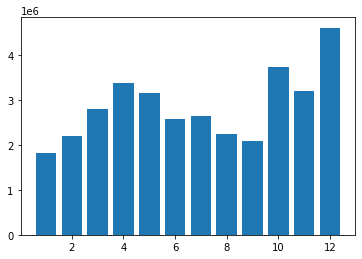

In [9]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, g['Sales'])

plt.show

## Question 2: What city had the highest number of sales?